# **PERAMALAN HARGA GABAH KERING PANEN TINGKAT PETANI MENGGUNAKAN ARIMA**
### OBJEKTIF : 
##### Peramalan harga gabah kering panen untuk 12 bulan kedepan.
### DATA :
##### Data yang digunakan merupakan data rata-rata harga gabah kering panen bulanan di Indonesia yang didapatkan melalui web BPS. Berikut link data: https://www.bps.go.id/indicator/36/1034/1/rata-rata-harga-gabah-bulanan-menurut-kualitas-komponen-mutu-dan-hpp-di-tingkat-petani.html.

## **IMPORT LIBRARY**

In [ ]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller #Check Stasionery
from statsmodels.graphics.tsaplots import plot_acf #Plot ACF
from statsmodels.graphics.tsaplots import plot_pacf #Plot PACF
import pmdarima as pm #Modelling ARIMA
import warnings
warnings.filterwarnings('ignore')

## **LOAD DATA**

In [20]:
price = pd.read_excel('/content/GKP.xlsx')

In [21]:
#Menampilkan 5 row data teratas
price.head()

,Date,Price GKP
0,2008-01-01,2741.78
1,2008-02-01,2703.50
2,2008-03-01,2540.69
3,2008-04-01,2586.81
4,2008-05-01,2667.48


In [22]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       184 non-null    datetime64[ns]
 1   Price GKP  184 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [23]:
#Merubah feature date menjadi index
price = price.set_index(['Date'])
price.head()

,Price GKP
Date,
2008-01-01,2741.78
2008-02-01,2703.50
2008-03-01,2540.69
2008-04-01,2586.81
2008-05-01,2667.48


## **EXPLORATORY DATA ANALYSIS**

In [24]:
price.describe().T

,count,mean,std,min,25%,50%,75%,max
Price GKP,184.0,4168.241957,846.96146,2152.41,3753.225,4411.805,4760.2175,5837.25


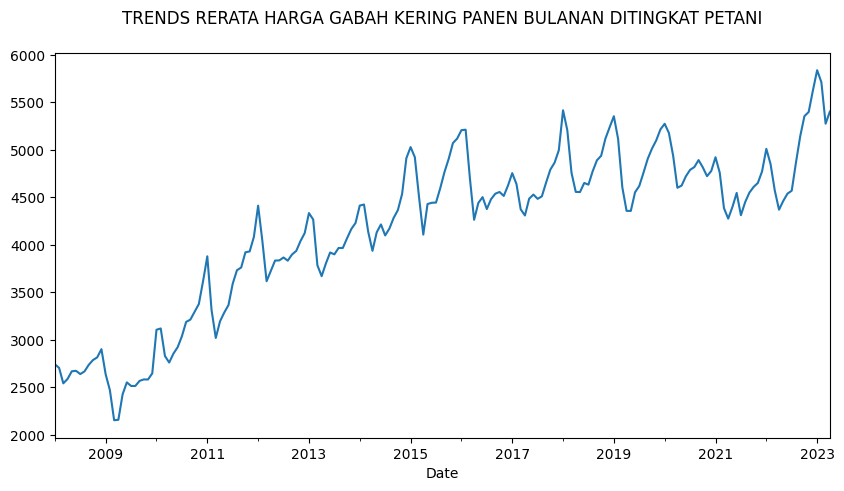

In [25]:
plt.figure(figsize=(10,5))
plt.title('TRENDS RERATA HARGA GABAH KERING PANEN BULANAN DITINGKAT PETANI\n')
price['Price GKP'].plot()
plt.show()

In [26]:
#Menampilkan rerata harga gabah kering panen bulanan terendah dan tertinggi
price[(price['Price GKP'] == max(price['Price GKP'])) | (price['Price GKP'] == min(price['Price GKP'])) ]

,Price GKP
Date,
2009-03-01,2152.41
2023-01-01,5837.25


Berdasarkan **hasil** diatas dapat diketahui bahwa:
1. Data terdiri dari **184 row data**.
2. Rerata harga gabah kering panen bulanan ditingkat petani pada periode **Januari 2008 - April 2023** seharga **Rp 4.168,24**.
3. Trends harga gabah kering panen bulanan relatif mengalami **kenaikan** dengan rerata harga gabah kering panen bulanan **tertinggi** pada bulan **Januari 2023** seharga **Rp 5.837,25** dan **terendah** pada bulan **Maret 2009** seharga **Rp 2.152,41**.

## **UJI STASIONERITAS DATA**
### Uji stasioneritas data dilakukan dengan menggunakan uji ***augmented Dickey-Fuller***. Data dikatakan stasioner jika **menolak hipotesis nol (H0)**: **p-value < alpha** dan dikonfirmasi dengan menggunakan **plot ACF yang meluruh secara lambat menuju nol**.

In [27]:
def ADF_Test(X, alpha):
    result = adfuller(X)
    labels = ['ADF Test Statistic','P-Value','#Lags Used','Number of Observations']
    print("===============================================================================================")
    for value,label in zip(result,labels):
        print(label+' : '+str(round(value,3)))
    if result[1] <= alpha:
      print("===============================================================================================")
      print("Conclusion:")
      print("\u001b[32mStationary\u001b[0m")
      print("===============================================================================================")
    else:
      print("===============================================================================================")
      print("Conclusion:")
      print("\x1b[31mNon-stationary\x1b[0m")
      print("===============================================================================================")

def plot_acf_pacf(X):
  fig = plt.figure(figsize = (8,7))
  fig.subplots_adjust(hspace=0.4)
  fig.suptitle("PLOT ACF dan PACF", fontsize=12)
  ax1 = fig.add_subplot(211)
  ax2 = fig.add_subplot(212)
  plot_acf(X, lags = 40, ax = ax1)
  plot_pacf(X, lags = 40, ax = ax2)
  plt.show()

In [28]:
ADF_Test(price['Price GKP'], alpha = 0.05)

ADF Test Statistic : -1.254
P-Value : 0.65
#Lags Used : 12
Number of Observations : 171
Conclusion:
Non-stationary


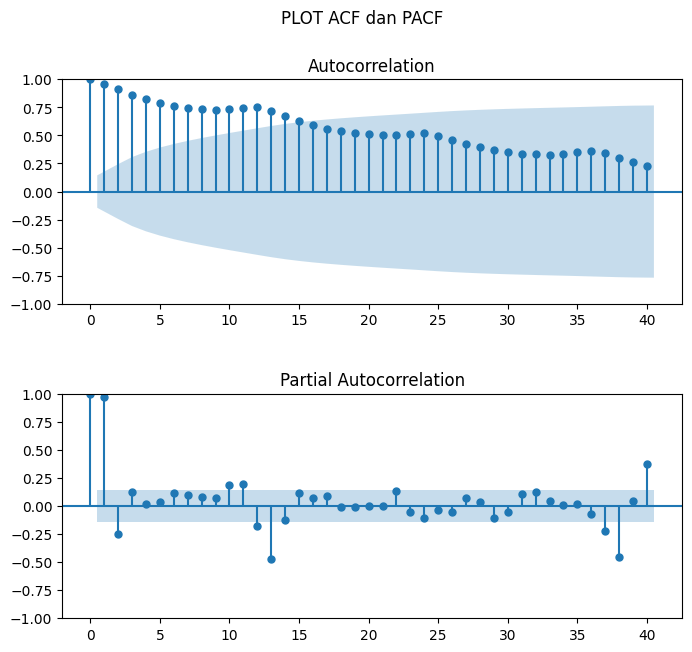

In [29]:
plot_acf_pacf(price['Price GKP'])

Berdasarkan hasil diatas dapat disimpulkan bahwa:
1. **p-value** pada uji **ADF** memiliki **nilai > alpha** sehingga menerima hipotesis nol (H0) serta disimpulkan **data tidak stasioner**.
2. **plot ACF** terlihat **meluruh secara lambat menuju nol**.

Oleh karena itu data perlu dilakukan sebuah transformasi dengan cara membentuk **data differencing**.

In [32]:
ADF_Test(price['Price GKP'].diff().dropna(), alpha = 0.05)

ADF Test Statistic : -2.604
P-Value : 0.092
#Lags Used : 11
Number of Observations : 171
Conclusion:
Non-stationary


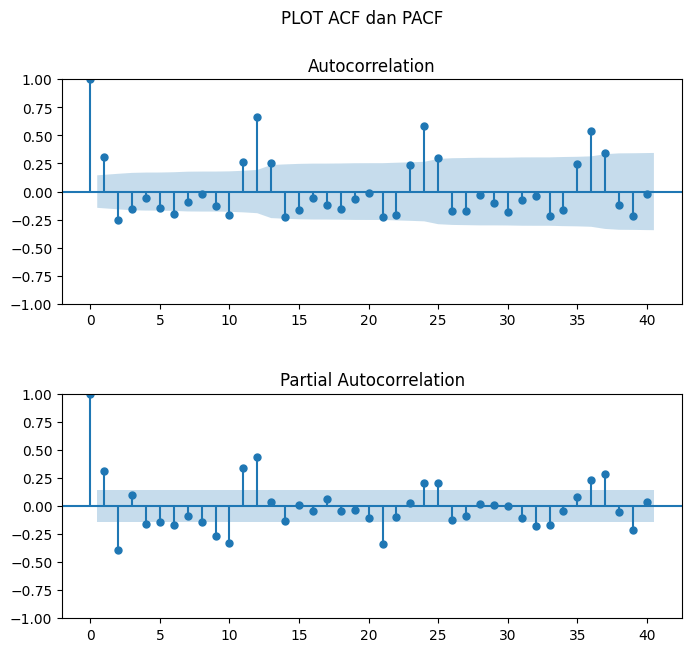

In [34]:
plot_acf_pacf(price['Price GKP'].diff().dropna())

Berdasarkan hasil diatas dapat disimpulkan bahwa:
**p-value** pada uji **ADF** memiliki **nilai > alpha** sehingga menerima hipotesis nol (H0) serta disimpulkan **data tidak stasioner**.

Oleh karena itu data perlu dilakukan sebuah transformasi kedua.

In [35]:
ADF_Test(price['Price GKP'].diff().diff().dropna(), alpha = 0.05)

ADF Test Statistic : -14.911
P-Value : 0.0
#Lags Used : 10
Number of Observations : 171
Conclusion:
Stationary


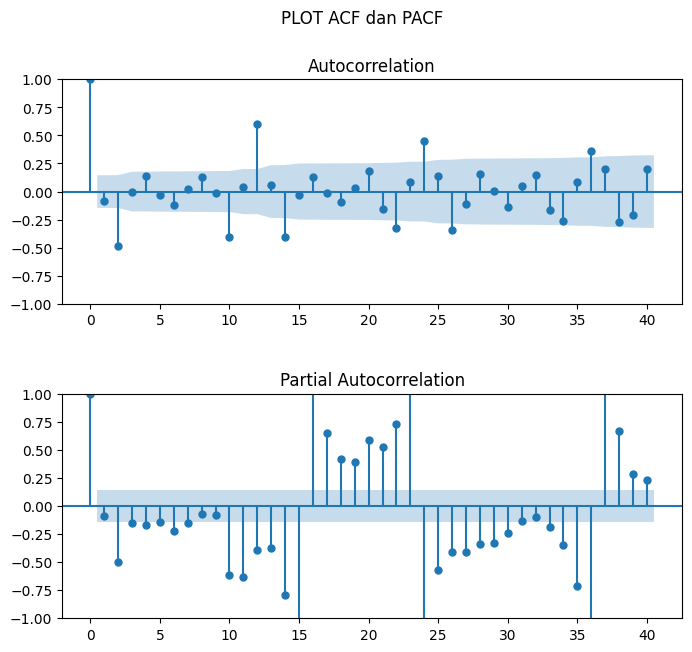

In [36]:
plot_acf_pacf(price['Price GKP'].diff().diff().dropna())

Berdasarkan hasil diatas dapat disimpulkan bahwa:
1. **p-value** pada uji **ADF** memiliki **nilai < alpha** sehingga menolak hipotesis nol (H0) serta disimpulkan **data stasioner**.
2. plot ACF(q) cut off pada lags 2, 10, 14, 22, 24, 26, dan 36 sehingga q dapat diisi dengan nilai tersebut dan ACF(Q) ada cut off kelipatan 12 sehingga adanya sebuah seasonal pada periode 12.
3. plot PACF(p) cut off pada lags 2, 4, 6, 10 - 30, 32 - 40  sehingga p dapat diisi dengan nilai tersebut dan PACF(P) da cut off kelipatan 12 sehingga adanya sebuah seasonal pada periode 12.

## ARIMA

In [48]:
model = pm.auto_arima(price['Price GKP'], 
                      start_p = 1, start_q = 1,
                      max_p = 4, max_q = 4,
                      d = 1,
                      max_d = 2,
                      m = 12,
                      seasonal = True, #Seasonal
                      start_P = 1, start_Q = 1,
                      D=1,
                      max_P = 4, max_Q = 4,
                      alpha = 0.05,
                      scoring = 'mse',
                      trace = True,
                      error_action = 'ignore', 
                      suppress_warnings = True, stepwise = True
                      )

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=2.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2186.238, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2163.164, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2133.876, Time=0.53 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2183.661, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=2.94 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2162.606, Time=0.38 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.36 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2133.503, Time=0.25 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2162.721, Time=0.19 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.64 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2134.392, T

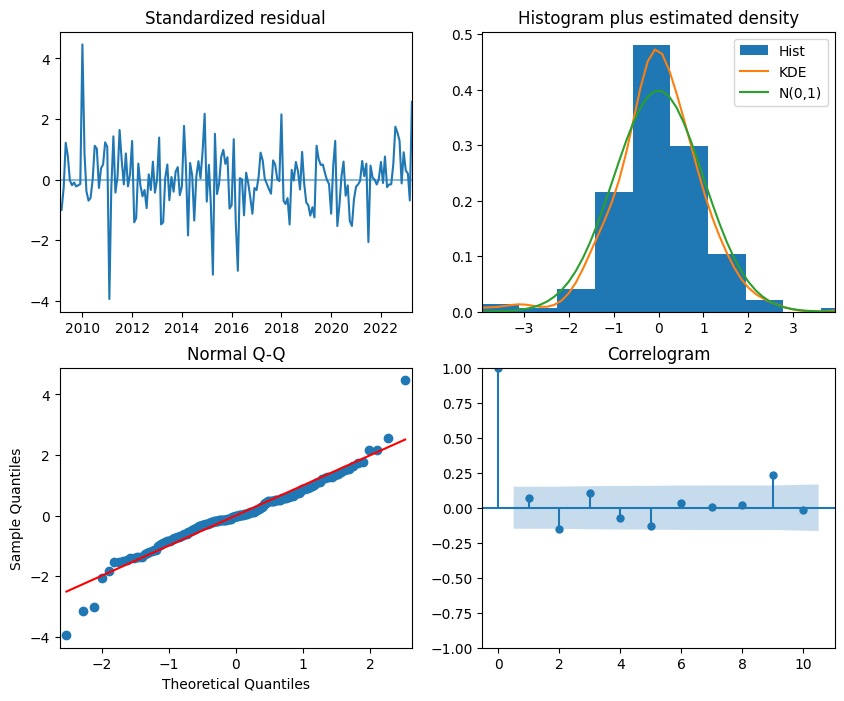

In [49]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

## SPLITING DATA

In [50]:
percent = 0.8
n = round(len(price['Price GKP'])*percent)
train = price.iloc[0:n,0]
test = price.iloc[n:,0]

## TRAINING MODEL

In [51]:
model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

## EVALUASI MODEL

<Figure size 1000x800 with 0 Axes>

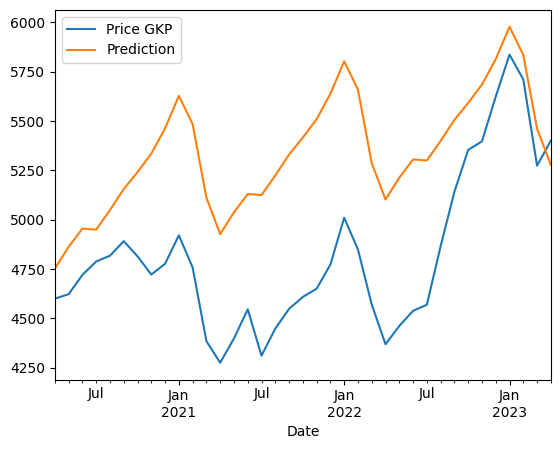

In [52]:
prediksi = model.predict(n_periods=len(test))
df_prediksi = pd.DataFrame(prediksi, index=test.index, columns=['Prediction'])

plt.figure(figsize = (10, 8))
pd.concat([test, df_prediksi],axis=1).plot()
plt.show()

In [53]:
def evaluasi_model(X, y):
  pred = X.predict(n_periods=len(y))
  mse = round(np.mean((pred-y)**2),3)
  rmse = round(np.mean((pred-y)**2)**.5,3)
  mae = round(np.mean(np.abs(pred-y)),3)
  mape = round(np.mean(np.abs(pred - y)/np.abs(y)),3)
  evaluasi = pd.DataFrame({
      'PARAMETER'  : ['MSE', 'RSME', 'MAE', 'MAPE'],
      'NILAI' : [mse, rmse, mae, mape]
  })
  evaluasi = evaluasi.set_index(['PARAMETER'])
  return evaluasi

In [54]:
evaluasi_model(model, test)

,NILAI
PARAMETER,
MSE,345274.796
RSME,587.601
MAE,525.695
MAPE,0.113


## FORECASTING

In [56]:
model.fit(price['Price GKP'])

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [61]:
prediksi_12bulan = model.predict(n_periods=12)

next_year = [pd.to_datetime('2023-05-01'),
            pd.to_datetime('2023-06-01'),
            pd.to_datetime('2023-07-01'),
            pd.to_datetime('2023-08-01'),
            pd.to_datetime('2023-09-01'),
            pd.to_datetime('2023-10-01'),
            pd.to_datetime('2023-11-01'),
            pd.to_datetime('2023-12-01'),
            pd.to_datetime('2024-01-01'),
            pd.to_datetime('2024-02-01'),
            pd.to_datetime('2024-03-01'),
            pd.to_datetime('2024-04-01')]

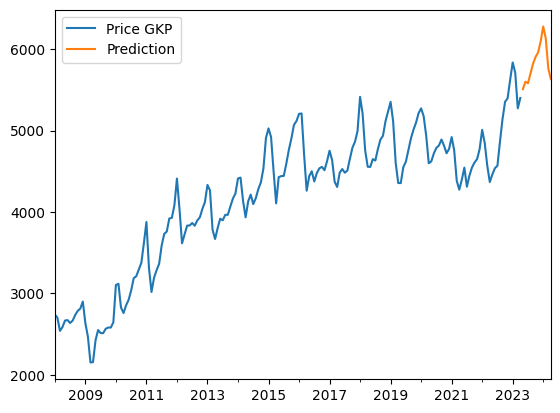

In [62]:
df_prediksi_12bulan = pd.DataFrame(prediksi_12bulan, index = next_year, columns=['Prediction'])

pd.concat([price['Price GKP'],df_prediksi_12bulan],axis=1).plot()
plt.show()

In [63]:
df_prediksi_12bulan

,Prediction
2023-05-01,5509.222312
2023-06-01,5601.281572
2023-07-01,5582.050254
2023-08-01,5702.533182
2023-09-01,5822.774477
2023-10-01,5905.316889
2023-11-01,5961.058384
2023-12-01,6096.515883
2024-01-01,6279.347329
2024-02-01,6133.177919


## KESIMPULAN

Berdasarkan hasil diatas dapat disimpulkan bahwa:
1. Metode ARIMA belum bagus untuk case/pemodelan harga Gabah Kering Panen. Hal tersebut dikarenakan nilai eror masih cukup tinggi antara prediksi dengan aktual. Disarankan untuk menggunakan algoritma lain.
2. Hasil peramalan untuk 12 bulan kedepan harga tertinggi Gabah Kering Panen pada bulan Januari 2024 sehingga dapat melakukan pembelian Gabah Kering Panen selain bulan tersebut. Pada bulan Januari 2024 alangkah banyak dilakukan penjualan produk beras untuk mendapatkan profit yang cukup besar.